# <h1 style='color: darkblue; font-size: 30px;'>Data Science - Predictive Maintenance Classification</h1>

<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>About the dataset</font>

### <font color='darkblue' style='font-size: 20;'>Data</font>

The dataset consists of 10 000 data points stored as rows with 14 features in columns

* **UID:** unique identifier ranging from 1 to 10000
* **productID:** consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
* **air temperature [K]:** generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
* **process temperature [K]:** generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
* **rotational speed [rpm]:** calculated from powepower of 2860 W, overlaid with a normally distributed noise
* **torque [Nm]:** torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
* **tool wear [min]:** The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
* **machine failure:** label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.
* **Target:** Failure or Not
* **Failure Type:** Type of Failure

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 10;'>The project</font>

### <font color='darkblue' style='font-size: 20;'>Description:</font>
Dataset to predict machine failure (binary) and type (multiclass), consists of 10 000 data points stored as rows with 14 features in columns.

The main goal of the project is to develop a machine failure prediction system using machine learning techniques.

https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>Preparation</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Importing the required libraries</font>

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### <font color='darkblue' style='font-size: 20;'>Reading the dataset</font>

In [178]:
df = pd.read_csv('predictive_maintenance.csv')

### <font color='darkblue' style='font-size: 20;'>Visualizating the dataset</font> 

In [179]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


### <font color='darkblue' style='font-size: 20;'> Renaming the columns</font> 

In [180]:
columns = {
    'Product ID': 'ProductID',
    'Air temperature [K]': 'AirTemperature',
    'Process temperature [K]':'ProcessTemperature',
    'Rotational speed [rpm]':'RotSpeed',
    'Torque [Nm]':'Torque',
    'Tool wear [min]':'ToolWear',
}

df.rename(columns=columns, inplace=True)

### <font color='darkblue' style='font-size: 20;'>Verifying the size of the dataset</font> 

In [181]:
df.shape

(10000, 10)

### <font color='darkblue' style='font-size: 20;'>Analyzing descriptive statistics</font> 

In [182]:
df.describe()

,UDI,AirTemperature,ProcessTemperature,RotSpeed,Torque,ToolWear,Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


### <font color='darkblue' style='font-size: 20;'>Checking if that there are no non-null values in the data</font> 

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UDI                 10000 non-null  int64  
 1   ProductID           10000 non-null  object 
 2   Type                10000 non-null  object 
 3   AirTemperature      10000 non-null  float64
 4   ProcessTemperature  10000 non-null  float64
 5   RotSpeed            10000 non-null  int64  
 6   Torque              10000 non-null  float64
 7   ToolWear            10000 non-null  int64  
 8   Target              10000 non-null  int64  
 9   Failure Type        10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [184]:
df.isnull().sum()

UDI                   0
ProductID             0
Type                  0
AirTemperature        0
ProcessTemperature    0
RotSpeed              0
Torque                0
ToolWear              0
Target                0
Failure Type          0
dtype: int64

In [185]:
df.isna().sum()

UDI                   0
ProductID             0
Type                  0
AirTemperature        0
ProcessTemperature    0
RotSpeed              0
Torque                0
ToolWear              0
Target                0
Failure Type          0
dtype: int64

No null value or NA 

### <font color='darkblue' style='font-size: 20;'>Checking for duplicate rows</font> 

In [186]:
df.duplicated().sum()

0

In [187]:
df['ProductID'].duplicated().sum()

0

No duplicated row

In [188]:
df.ProductID.value_counts().max()

1

There is only 1 line for each ProductID, and it can be deleted

# <font color='darkblue' style='font-size: 20;'>Processing</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Exploratory Data Analysis</font> 

L    6000
M    2997
H    1003
Name: Type, dtype: int64

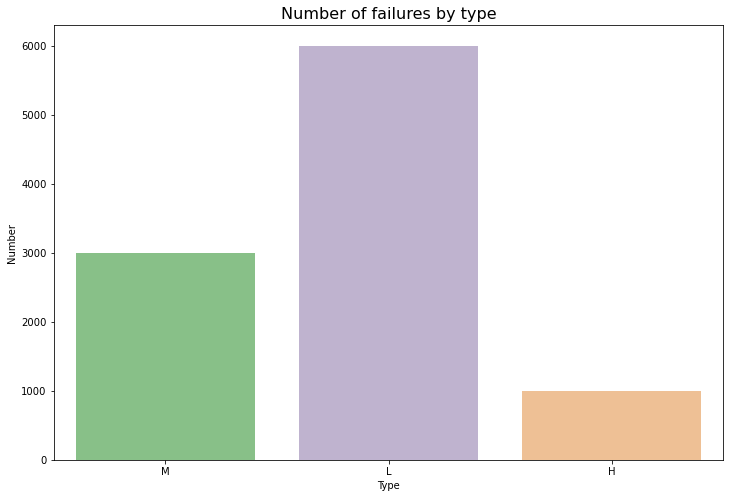

In [189]:
#Number of failures by type

ax = sns.countplot(data=df, x='Type', palette='Accent')
ax.set_title('Number of failures by type', fontsize=16)
ax.set(xlabel='Type')
ax.set(ylabel='Number')

df.Type.value_counts()

Target,0,1
Type,,
H,982,21
L,5765,235
M,2914,83


<Figure size 1008x576 with 0 Axes>

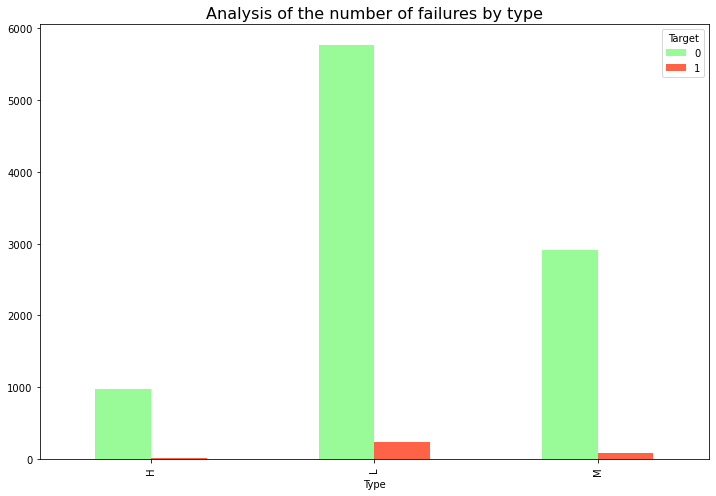

In [190]:
#Analysis of the number of failures by type

fig = plt.figure(figsize=(14,8))
color = {0: 'palegreen', 1: 'tomato'}
ax = pd.crosstab(df.Type, df.Target).plot(kind="bar", color=color)
ax.set_title("Analysis of the number of failures by type", fontsize=16)
pd.crosstab(df.Type, df.Target)

In [191]:
#Percentage of failures by type

perc = pd.crosstab(df.Type, df.Target)
x = round((perc[1]/(perc[0]+perc[1]))*100,2)
x

Type
H    2.09
L    3.92
M    2.77
dtype: float64

0    9661
1     339
Name: Target, dtype: int64

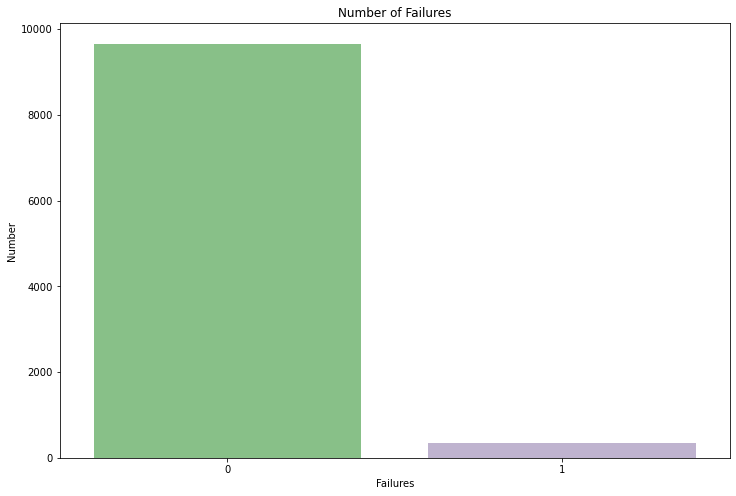

In [192]:
#Number of Failures

ax = sns.countplot(data=df, x='Target', palette='Accent')
ax.set_title('Number of Failures')
ax.set(xlabel='Failures')
ax.set(ylabel='Number')

df.Target.value_counts()

In [193]:
df.Target.value_counts(normalize=True)*100

0    96.61
1     3.39
Name: Target, dtype: float64

**It might be necessary to rebalance the data**

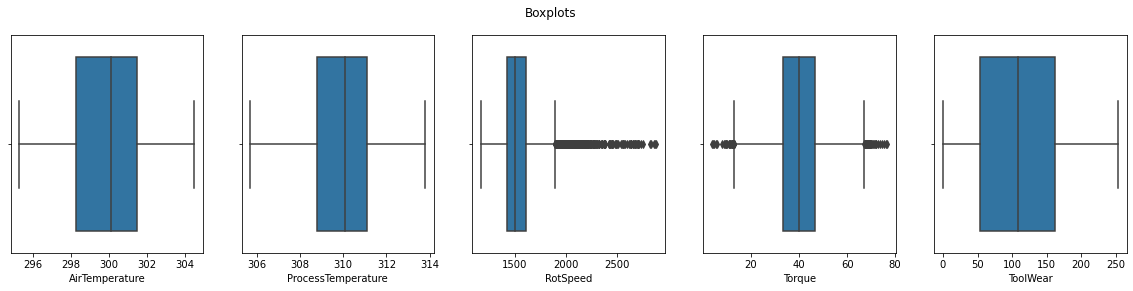

In [194]:
#General analysis
fig, ax = plt.subplots(1,5,  figsize=(20,4))
fig.suptitle('Boxplots')
sns.boxplot(ax=ax[0], x=df.AirTemperature)
sns.boxplot(ax=ax[1], x=df.ProcessTemperature)
sns.boxplot(ax=ax[2], x=df.RotSpeed)
sns.boxplot(ax=ax[3], x=df.Torque)
sns.boxplot(ax=ax[4], x=df.ToolWear)
plt.show()

In [195]:
df_1 = df.query('Target==1')
df_0 = df.query('Target==0')

In [196]:
df_1.describe().round(2)

,UDI,AirTemperature,ProcessTemperature,RotSpeed,Torque,ToolWear,Target
count,339.00,339.00,339.00,339.00,339.00,339.00,339.0
mean,4647.72,300.89,310.29,1496.49,50.17,143.78,1.0
std,2380.54,2.07,1.36,384.94,16.37,72.76,0.0
min,51.00,295.60,306.10,1181.00,3.80,0.00,1.0
25%,3555.00,299.10,309.50,1326.50,45.95,84.50,1.0
50%,4442.00,301.60,310.40,1365.00,53.70,165.00,1.0
75%,5971.00,302.50,311.20,1421.50,61.20,207.50,1.0
max,9975.00,304.40,313.70,2886.00,76.60,253.00,1.0


In [197]:
df_0.describe().round(2)

,UDI,AirTemperature,ProcessTemperature,RotSpeed,Torque,ToolWear,Target
count,9661.00,9661.00,9661.00,9661.00,9661.00,9661.00,9661.0
mean,5012.88,299.97,310.00,1540.26,39.63,106.69,0.0
std,2902.38,1.99,1.49,167.39,9.47,62.95,0.0
min,1.00,295.30,305.70,1168.00,12.60,0.00,0.0
25%,2479.00,298.30,308.80,1429.00,33.10,52.00,0.0
50%,5068.00,300.00,310.00,1507.00,39.90,107.00,0.0
75%,7532.00,301.50,311.10,1615.00,46.30,160.00,0.0
max,10000.00,304.50,313.80,2695.00,70.00,246.00,0.0


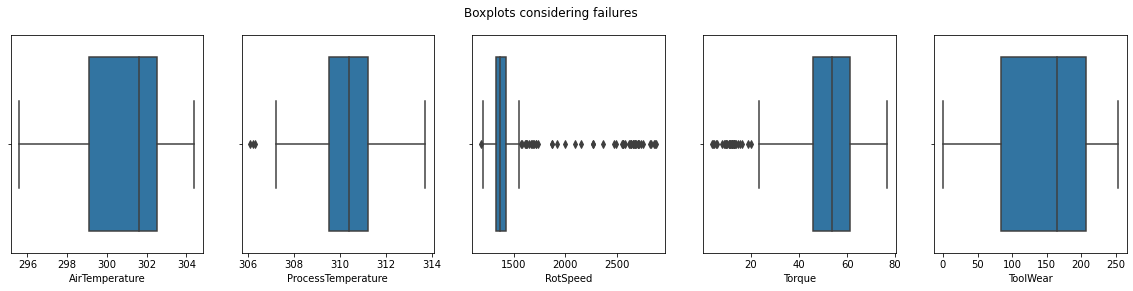

In [198]:
#General analysis
fig, ax = plt.subplots(1,5,  figsize=(20,4))
fig.suptitle('Boxplots considering failures')
sns.boxplot(ax=ax[0], x=df_1.AirTemperature)
sns.boxplot(ax=ax[1], x=df_1.ProcessTemperature)
sns.boxplot(ax=ax[2], x=df_1.RotSpeed)
sns.boxplot(ax=ax[3], x=df_1.Torque)
sns.boxplot(ax=ax[4], x=df_1.ToolWear)
plt.show()

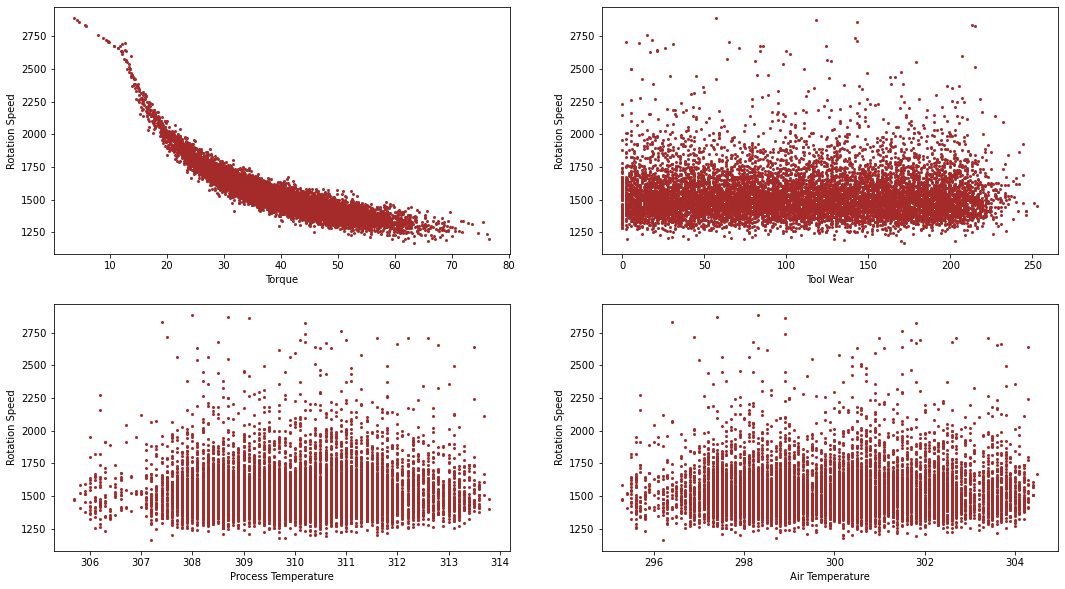

In [199]:
# Initialise the subplot function using number of rows and columns
 
figure, axis = plt.subplots(2, 2, figsize=(18,10))
  
# For Torque x Rotation Speed
axis[0, 0].plot(df.Torque,df.RotSpeed,'o',markersize=2, color='brown')
axis[0, 0].set_xlabel('Torque')
axis[0, 0].set_ylabel('Rotation Speed')

# For ToolWear x Rotation Speed
axis[0, 1].plot(df.ToolWear,df.RotSpeed,'o',markersize=2, color='brown')
axis[0, 1].set_xlabel('Tool Wear')
axis[0, 1].set_ylabel('Rotation Speed')
  
# For ProcessTemperature x Rotation Speed
axis[1, 0].plot(df.ProcessTemperature,df.RotSpeed,'o',markersize=2, color='brown')
axis[1, 0].set_xlabel('Process Temperature')
axis[1, 0].set_ylabel('Rotation Speed')
  
# For AirTemperature x Rotation Speed
axis[1, 1].plot(df.AirTemperature,df.RotSpeed,'o',markersize=2, color='brown')
axis[1, 1].set_xlabel('Air Temperature')
axis[1, 1].set_ylabel('Rotation Speed')
  
# Combine all the operations and display
plt.show()

**There is a negative relationship between RotSpeed and Torque. Among the others there is no**

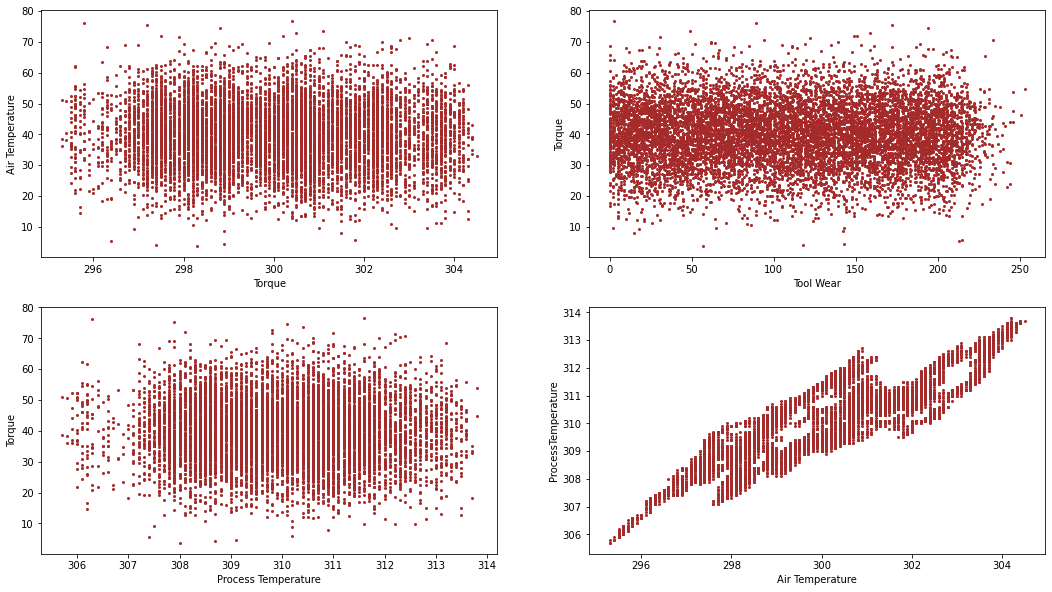

In [200]:
# Initialise the subplot function using number of rows and columns
 
figure, axis = plt.subplots(2, 2, figsize=(18,10))
  
# For Torque x Rotation Speed
axis[0, 0].plot(df.AirTemperature,df.Torque,'o',markersize=2, color='brown')
axis[0, 0].set_xlabel('Torque')
axis[0, 0].set_ylabel('Air Temperature')

# For ToolWear x Rotation Speed
axis[0, 1].plot(df.ToolWear,df.Torque,'o',markersize=2, color='brown')
axis[0, 1].set_xlabel('Tool Wear')
axis[0, 1].set_ylabel('Torque')
  
# For ProcessTemperature x Rotation Speed
axis[1, 0].plot(df.ProcessTemperature,df.Torque,'o',markersize=2, color='brown')
axis[1, 0].set_xlabel('Process Temperature')
axis[1, 0].set_ylabel('Torque')
  
# For AirTemperature x ProcessTemperature
axis[1, 1].plot(df.AirTemperature,df.ProcessTemperature,'o',markersize=2, color='brown')
axis[1, 1].set_xlabel('Air Temperature')
axis[1, 1].set_ylabel('ProcessTemperature')
  
# Combine all the operations and display
plt.show()

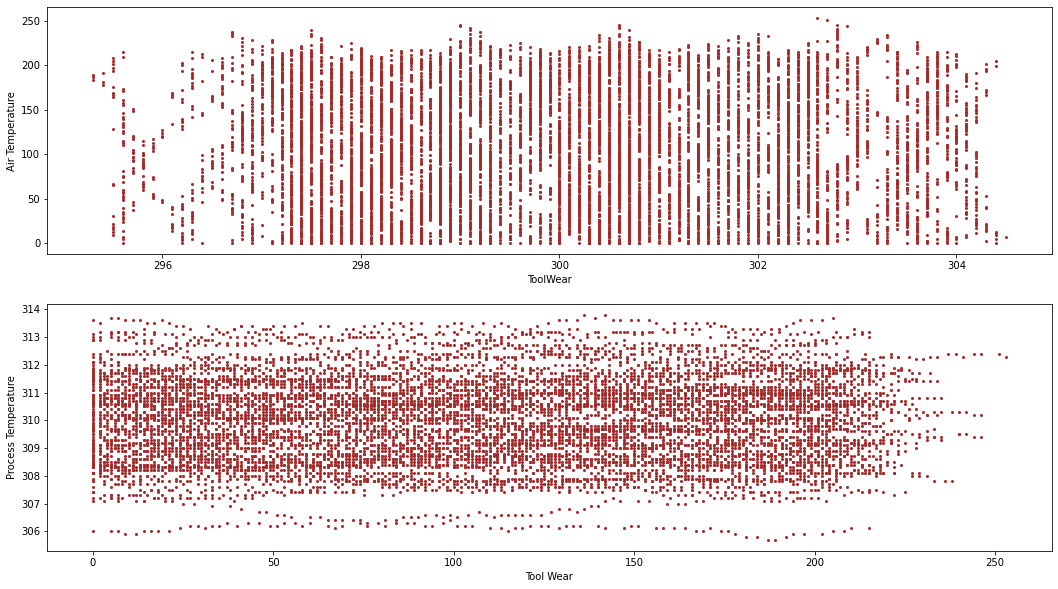

In [201]:
# Initialise the subplot function using number of rows and columns
 
figure, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))
  
# For ToolWear x AirTemperature
ax1.plot(df.AirTemperature,df.ToolWear,'o',markersize=2, color='brown')
ax1.set_xlabel('ToolWear')
ax1.set_ylabel('Air Temperature')

# For ToolWear x ProcessTemperature
ax2.plot(df.ToolWear,df.ProcessTemperature,'o',markersize=2, color='brown')
ax2.set_xlabel('Tool Wear')
ax2.set_ylabel('Process Temperature')
  
# Combine all the operations and display
plt.show()

In [202]:
df_0 = df.query('Target==0')
df_1 = df.query('Target==1')

<AxesSubplot:xlabel='RotSpeed', ylabel='Density'>

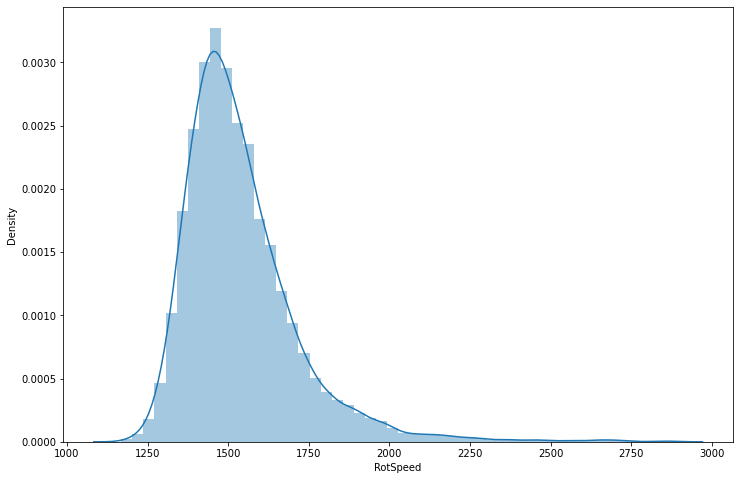

In [203]:
sns.distplot(df.RotSpeed)

<AxesSubplot:xlabel='RotSpeed', ylabel='Density'>

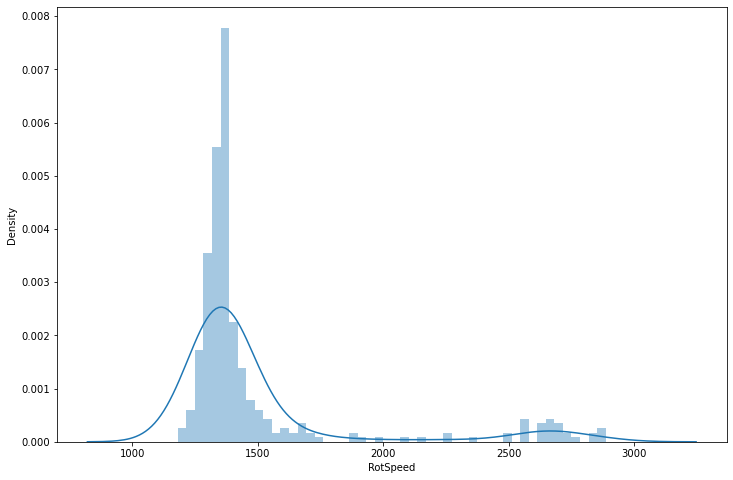

In [204]:
sns.distplot(df_1.RotSpeed)

### <font color='darkblue' style='font-size: 20;'>Correlation Matrix</font> 

In [205]:
df.corr()

,UDI,AirTemperature,ProcessTemperature,RotSpeed,Torque,ToolWear,Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
AirTemperature,0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
ProcessTemperature,0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
RotSpeed,-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
ToolWear,-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


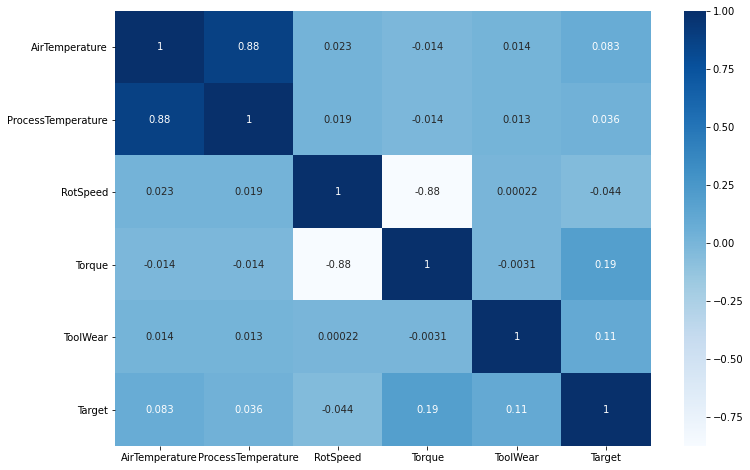

In [206]:
sns.heatmap(df[['AirTemperature',
                'ProcessTemperature', 
                'RotSpeed', 
                'Torque', 
                'ToolWear',
               'Target']].corr(), cmap='Blues', annot=True)
plt.show()

### <font color='darkblue' style='font-size: 20;'>Droping Columns</font> 

In [207]:
#Removendo colunas
df.drop(columns = ['UDI', 'ProductID', 'Type', 'Failure Type'], inplace=True)

# <font color='darkblue' style='font-size: 20;'>Building the model</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Logistic Regression</font> 

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics

In [209]:
#Setting the value for dependent and independent variables
x = df.drop('Target', axis=1)
y = df.Target

In [210]:
#Splitting the dataset
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [211]:
#Creating the Logistic Regression model
lr = LR(max_iter=1000, random_state=SEED)

In [212]:
#Fitting the Logistic Regression model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [213]:
#Prediction of test set
y_pred = lr.predict(X_test)

In [214]:
#Metrics
print("Acurácia:",round(metrics.accuracy_score(y_test, y_pred),4))
print("Precisão:",round(metrics.precision_score(y_test, y_pred),4))
print("Recall:",round(metrics.recall_score(y_test, y_pred),4))
print("F1:",round(metrics.f1_score(y_test, y_pred),4))

Acurácia: 0.974
Precisão: 0.6296
Recall: 0.2361
F1: 0.3434


**CONCLUSIONS:**

* **Accuracy:** It's good, it means the model is getting it right
* **Precision:** Evaluates the amount of true positives, that is, how often the failure is occurring, medium
* **Recall:** Evaluates the model's ability to correctly classify whether it is a failure or not. Not Good
* **F1:** High accuracy and low F1 means that the accuracy may not be so reliable

#### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - LR Model</font> 

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

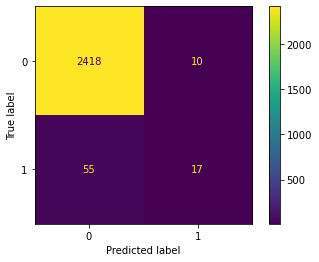

In [216]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Hitting a lot in one class and a little in another, the other values are very low

#### <font color='darkblue' style='font-size: 20;'>Curva ROC - LR Model</font> 

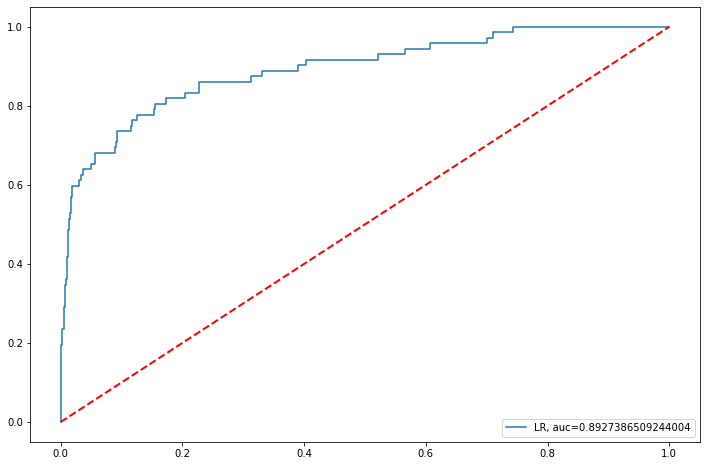

In [217]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize']=(12.,8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='r', lw=2, linestyle='--')
plt.legend(loc=4)

The faster the blue curve reaches 1, the better. AUC is relatively good, accuracy is good but the other metrics are not, maybe because of the unbalance

<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Data Balancing</font> 

In [218]:
from imblearn.over_sampling import SMOTE

In [219]:
smote = SMOTE(random_state=SEED)

In [220]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [221]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)

In [222]:
df_balanced.head()

,Target,AirTemperature,ProcessTemperature,RotSpeed,Torque,ToolWear
0,0,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9


In [223]:
df_balanced.shape

(19322, 6)

In [224]:
df_balanced.Target.value_counts()

0    9661
1    9661
Name: Target, dtype: int64

# <font color='darkblue' style='font-size: 20;'>New tests</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Logistic Regression</font> 

In [225]:
#Setting the value for dependent and independent variables
x = df_balanced.drop('Target', axis=1)
y = df_balanced.Target

In [226]:
#Splitting the dataset
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=SEED)

In [227]:
#Creating the Logistic Regression model
lr = LR(max_iter=1000, random_state=SEED)

In [228]:
#Fitting the Logistic Regression model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [229]:
#Prediction of test set
y_pred = lr.predict(X_test)

In [230]:
#Metrics
print("Acurácia:",round(metrics.accuracy_score(y_test, y_pred),4))
print("Precisão:",round(metrics.precision_score(y_test, y_pred),4))
print("Recall:",round(metrics.recall_score(y_test, y_pred),4))
print("F1:",round(metrics.f1_score(y_test, y_pred),4))

Acurácia: 0.8249
Precisão: 0.8236
Recall: 0.8257
F1: 0.8246


Accuracy decreased a bit, but the other metrics improved a lot

#### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - LR Model</font> 

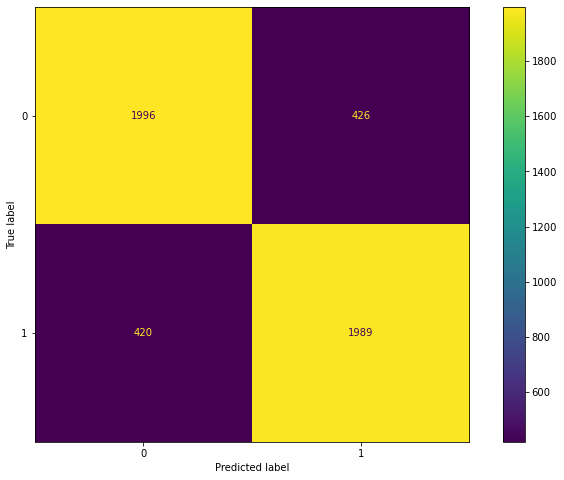

In [231]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### <font color='darkblue' style='font-size: 20;'>Curva ROC - LR Model</font> 

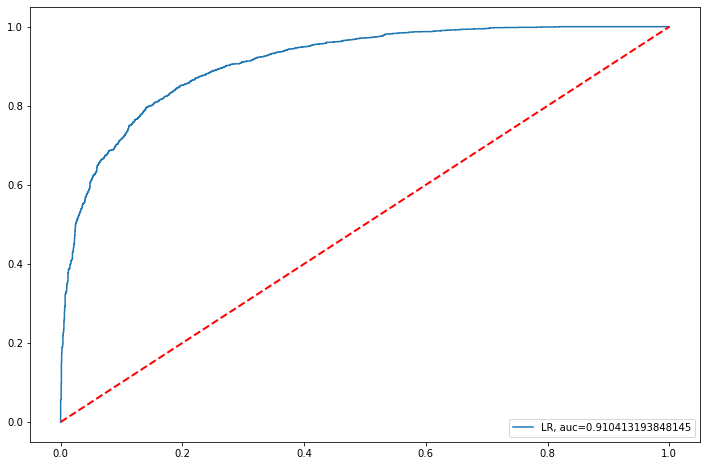

In [232]:
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize']=(12.,8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='r', lw=2, linestyle='--')
plt.legend(loc=4)

<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Decision Tree</font> 

In [233]:
from sklearn.tree import DecisionTreeClassifier

In [234]:
#Creating the Decision Tree model
dt = DecisionTreeClassifier(max_depth = 5, random_state=SEED)

In [235]:
#Fitting the Logistic Regression model and making predictions of test set
model = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [236]:
#Metrics
print("Acurácia:",metrics.accuracy_score(y_test, y_pred).round(4))
print("Precisão:",metrics.precision_score(y_test, y_pred).round(4))
print("Recall:",metrics.recall_score(y_test, y_pred).round(4)) 
print("F1:",metrics.f1_score(y_test, y_pred).round(4))

Acurácia: 0.9331
Precisão: 0.9043
Recall: 0.9685
F1: 0.9353


#### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - DT Model</font> 

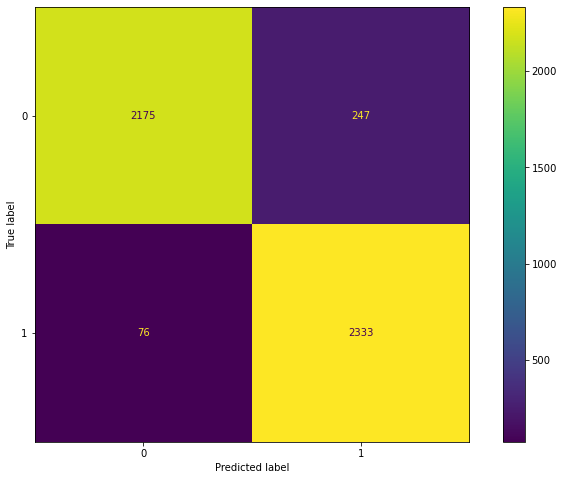

In [237]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### <font color='darkblue' style='font-size: 20;'>Curva ROC - DT Model</font> 

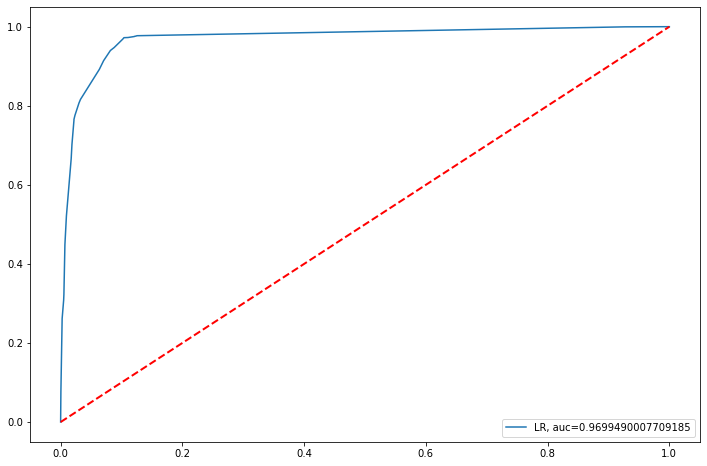

In [238]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize']=(12.,8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='r', lw=2, linestyle='--')
plt.legend(loc=4)

<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Random Forest</font> 

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
#Creating the Random Forest model
rf = RandomForestClassifier(max_depth=5, random_state=SEED)

In [241]:
#Fitting the Random Forest model and making predictions of test set 
model = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [242]:
#Metrics
print("Acurácia:",metrics.accuracy_score(y_test, y_pred).round(4))
print("Precisão:",metrics.precision_score(y_test, y_pred).round(4))
print("Recall:",metrics.recall_score(y_test, y_pred).round(4)) 
print("F1:",metrics.f1_score(y_test, y_pred).round(4))

Acurácia: 0.9336
Precisão: 0.9059
Recall: 0.9672
F1: 0.9356


#### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - RF Model</font> 

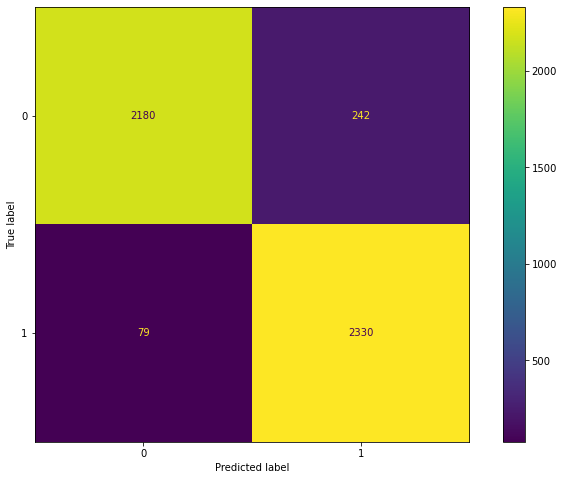

In [243]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### <font color='darkblue' style='font-size: 20;'>Curva ROC - RF Model</font> 

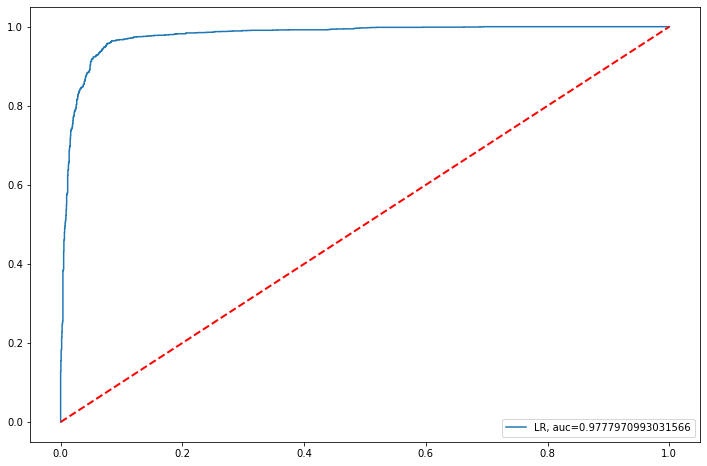

In [244]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize']=(12.,8.)
plt.plot(fpr, tpr, label="LR, auc="+str(auc))
plt.plot([0,1], [0,1], color='r', lw=2, linestyle='--')
plt.legend(loc=4)

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>Analyzing the model results</font>
<hr style = 'border: 1px solid darkblue;'>

In [245]:
classifiers = [LR(max_iter=1000, random_state=SEED),
               DecisionTreeClassifier(max_depth = 5, random_state=SEED),
               RandomForestClassifier(max_depth= 5, random_state = SEED)]

In [246]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)
    print('****Resultados****')
    y_pred = clf.predict(X_test)
    print("Acurácia:",metrics.accuracy_score(y_test, y_pred).round(4))
    print("Precisão:",metrics.precision_score(y_test, y_pred).round(4))
    print("Recall:",metrics.recall_score(y_test, y_pred).round(4)) 
    print("F1:",metrics.f1_score(y_test, y_pred).round(4))
    
    #cm = confusion_matrix(y_test, y_pred)
    #disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #disp.plot()

LogisticRegression
****Resultados****
Acurácia: 0.8249
Precisão: 0.8236
Recall: 0.8257
F1: 0.8246
DecisionTreeClassifier
****Resultados****
Acurácia: 0.9331
Precisão: 0.9043
Recall: 0.9685
F1: 0.9353
RandomForestClassifier
****Resultados****
Acurácia: 0.9336
Precisão: 0.9059
Recall: 0.9672
F1: 0.9356


# <font color='darkblue' style='font-size: 20;'>Improving the Random Forest Model</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>RandomSearchCV</font>

In [247]:
from sklearn.model_selection import RandomizedSearchCV

In [248]:
n_estimators = np.arange(20,200,step=20)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = list(np.arange(2,10,step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [249]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [250]:
rforest = RandomForestClassifier(random_state=70)

In [251]:
random_cv = RandomizedSearchCV(rforest,
                              param_grid,
                              n_iter=5,
                              cv=3,
                              scoring='recall',
                              n_jobs=-1,
                              random_state=70)

In [252]:
%%time
rcv = random_cv.fit(x, y)

Wall time: 11.3 s


In [253]:
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}

# <font color='darkblue' style='font-size: 20;'>Final Model</font>
<hr style = 'border: 1px solid darkblue;'>

In [254]:
#Creating the Random Forest model
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

#Fitting the Random Forest model and making predictions of test set 
model = rfn.fit(X_train, y_train)
y_pred = rfn.predict(X_test)

In [255]:
#Metrics
print("Acurácia:",metrics.accuracy_score(y_test, y_pred).round(4))
print("Precisão:",metrics.precision_score(y_test, y_pred).round(4))
print("Recall:",metrics.recall_score(y_test, y_pred).round(4)) 
print("F1:",metrics.f1_score(y_test, y_pred).round(4))

Acurácia: 0.9553
Precisão: 0.9416
Recall: 0.9705
F1: 0.9558


### <font color='darkblue' style='font-size: 20;'>Confusion Matrix - Final RF Model</font>

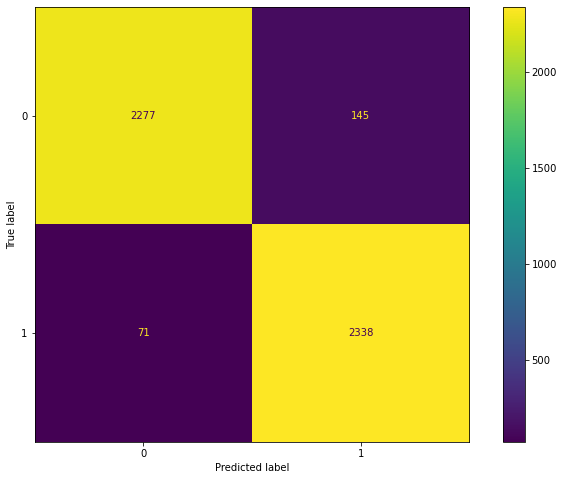

In [256]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# <font color='darkblue' style='font-size: 20;'>Pickling the model file</font>
<hr style = 'border: 1px solid darkblue;'>

In [257]:
import pickle

In [277]:
output = open('classification_maintenance_model', 'wb')
pickle.dump(rfn, output)
#output.close()

In [282]:
pickled_model = pickle.load(open('classification_maintenance_model','rb'))

### <font color='darkblue' style='font-size: 20;'>Prediction</font>

In [289]:
AirTemperature = 155
ProcessTemperature = 876
RotSpeed = 567
Torque = 24
ToolWear = 0

data = [[AirTemperature, ProcessTemperature, RotSpeed, Torque, ToolWear]]

#Prediction
pickled_model.predict(data)

array([0], dtype=int64)